# Risky Business

Harold has been participating in some risky business. He recently became seriously involved in the cryptocurrency market and has seen some excellent returns. Harold's recent returns have him strutting around the office like he's the best trader. He even had the audacity to bet you $5 that his portfolio returns are better than yours.

Using standard deviation and sharpe ratios, do the following:

* Identify which cryptocurrencies have the greatest risk-to-reward ratio.

* Determine which portfolio (yours or Harold's) has made the smartest investments.

* Identify which cryptocurrencies have the greatest Sharpe ratios (risk/reward).

## Instructions

### Import the Required Libraries

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

### Read in data

In [27]:
# Set the path of the CSV files
harold = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 3\3\11-Stu_Risky_Business\Resources\harold_portfolio.csv'
my = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 3\3\11-Stu_Risky_Business\Resources\my_portfolio.csv'
 
# Read in data
harold_df = pd.read_csv(harold)
my_df = pd.read_csv(my)

In [28]:
# Display sample data to explore column names and values
harold_df.head(10)
harold_df.shape

(1632, 11)

In [29]:
my_df.head()
my_df.shape

(1632, 7)

In [30]:
# Drop na
harold_df_drop = harold_df.dropna()
harold_df_drop.shape

(6, 11)

In [31]:
my_df_drop = my_df.dropna()
my_df_drop.shape

(988, 7)

In [32]:
harold_df_drop.head(10)

,Date,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
0,2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
1,2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2,2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
3,2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
4,2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725
5,2019-05-15,8203.32,0.000852,0.003308,217.44,91.69,0.456005,0.224973,0.137002,0.031348,0.020377


In [33]:
my_df_drop.head()

,Date,BTC,DOGE,ETH,LTC,XRP,XLM
0,2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
1,2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2,2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
3,2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
4,2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283


In [34]:
# Set Date as index
harold_df_drop_idx = harold_df_drop.set_index('Date')
harold_df_drop_idx.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [35]:
my_df_drop_idx = my_df_drop.set_index('Date')
my_df_drop_idx

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283
...,...,...,...,...,...,...
2016-08-28,570.42,0.000230,11.21,3.78,0.005869,0.002020
2016-08-27,578.89,0.000228,11.29,3.81,0.005902,0.001931
2016-08-26,576.16,0.000242,11.34,3.81,0.005892,0.001925


### Calculate daily returns 

In [36]:
# Calculate daily returns for each portfolio
harold_daily_returns = harold_df_drop_idx.pct_change().copy()
my_daily_returns = my_df_drop_idx.pct_change().copy()

In [37]:
# Display sample data
harold_daily_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557


In [38]:
my_daily_returns.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709


### `Concat` portfolios into one DataFrame

In [52]:
# Concat returns DataFrames
combined_df = pd.concat([harold_daily_returns, my_daily_returns], axis='columns', join='inner')
combined_df

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### Calculate `std dev` for all data

In [53]:
# Calculate std dev
combined_df_sd = combined_df.std().copy()
combined_df_sd

BTC      0.070488
BTT      0.030731
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
SOLVE    0.059016
XLM      0.065825
TRON     0.064923
ZIL      0.064726
BTC      0.071562
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
XLM      0.065825
dtype: float64

In [56]:
combined_df_sd.sort_values(ascending=False)

ETH      0.091517
ETH      0.091517
LTC      0.084703
LTC      0.084703
XRP      0.080277
XRP      0.080277
BTC      0.071562
BTC      0.070488
XLM      0.065825
XLM      0.065825
TRON     0.064923
ZIL      0.064726
SOLVE    0.059016
DOGE     0.050907
DOGE     0.050907
BTT      0.030731
dtype: float64

### Calculate `sharpe ratio` for all data

In [57]:
# Calculate sharpe ratio
#The greater a portfolio's Sharpe ratio, the better its risk-adjusted-performance. If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio’s return
#or the portfolio's return is expected to be negative. In either case, a negative Sharpe ratio does not convey any useful meaning.
sharpe_ratio = combined_df.mean()/combined_df.std() * np.sqrt(252)
sharpe_ratio

BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
BTC      -0.671876
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
XLM       0.937406
dtype: float64

### Plot Sharpe Ratios

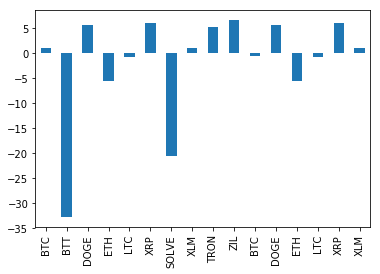

In [58]:
# Plot sharpe ratios using a bar chart
sharpe_ratio.plot(kind='bar')

In [62]:
harold_df.head()

,Date,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
0,2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
1,2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2,2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
3,2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
4,2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### How many smart investments did Harold make compared to risky investments? How many did you make?

**Harold: 4 smart; 3 questionable, 3 risky. My: 2 smart; 3 questionable, 1 risky**

### Which cryptos have been the smartest investment?

**DOGE, XRP, TRON, and ZIL**

### Challenge

Calculate the Sharpe ratio for your entire portfolio. Then, use a comparison operator to see which portfolio has the greatest risk-to-reward ratio.

In [63]:
sharpe_ratio_my = my_df_drop_idx.mean() / my_df_drop_idx.std() * np.sqrt(252)
sharpe_ratio_my

BTC     21.212561
DOGE    18.051385
ETH     16.403047
LTC     15.971078
XRP     14.302602
XLM     14.443100
dtype: float64

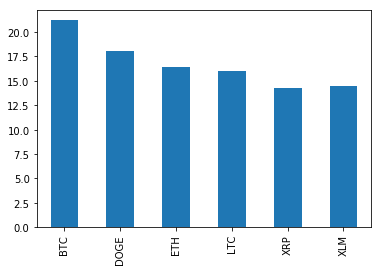

In [64]:
sharpe_ratio_my.plot(kind='bar')

### Calculate annualized standar deviaton for each portfolio individually

In [67]:
# Calculate standar deviaton for all investments for each portfolio
harold_df_drop_idx_sd = harold_df_drop_idx.std()

In [68]:
# Print Harold's annual standard deviation
harold_df_drop_idx_sd

BTC      424.519506
BTT        0.000122
DOGE       0.000130
ETH       17.497852
LTC        5.431808
XRP        0.029508
SOLVE      0.045241
XLM        0.005639
TRON       0.001620
ZIL        0.001019
dtype: float64

In [69]:
# Print my annual standard deviation
my_df_drop_idx_sd = my_df_drop_idx.std()
my_df_drop_idx_sd

BTC     3686.994854
DOGE       0.002247
ETH      271.134655
LTC       64.849415
XRP        0.408726
XLM        0.145318
dtype: float64

### Calculate the sharpe ratios for each individual portfolio

In [79]:
# Calculate sharpe ratio
sharpe_ratio_harold = harold_df_drop_idx.mean() / harold_df_drop_idx.std() * np.sqrt(252)
sharpe_ratio_my = my_df_drop_idx.mean() / my_df_drop_idx.std() * np.sqrt(252)

In [80]:
# Print Harold's sharpe ratios
sharpe_ratio_harold

BTC      293.086914
BTT      128.691393
DOGE     378.953664
ETH      222.352037
LTC      273.395855
XRP      219.699810
SOLVE     95.588831
XLM      378.488614
TRON     281.038506
ZIL      290.248590
dtype: float64

In [81]:
# Print my sharpe ratios
sharpe_ratio_my

BTC     21.212561
DOGE    18.051385
ETH     16.403047
LTC     15.971078
XRP     14.302602
XLM     14.443100
dtype: float64

In [73]:
sharpe_ratio_harold_avg = sharpe_ratio_harold.mean()
sharpe_ratio_harold_avg

256.15442147532383

In [83]:
sharpe_ratio_my_avg = sharpe_ratio_my.mean()
sharpe_ratio_my_avg

16.73062873387194

### Average sharpe ratios for each portfolio and output to screen

In [84]:
# Display results
print("Harold's sharpe ratio average:", sharpe_ratio_harold_avg)
print("My sharpe ratio average:", sharpe_ratio_my_avg)

Harold's sharpe ratio average: 256.15442147532383
My sharpe ratio average: 16.73062873387194


### Compare Sharpe Ratios Averages

In [86]:
if sharpe_ratio_harold_avg > sharpe_ratio_my_avg:
    print("Harold's investment is better.")
else:
    print("My investment is better.")

Harold's investment is better.


### Which portfolio is the smartest investment, based on risk to reward ratio?

**Harold's**